In [2]:
#ignoring the warnings since tensor flow will give  a lot of them
import warnings
warnings.filterwarnings("ignore")

# Importing all libraries
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation,BatchNormalization
import pickle

In [4]:
#Load data from pickle files we stored before
pickle_in=open("x_train.pickle","rb")
x_train=pickle.load(pickle_in)

pickle_in=open("y_train.pickle","rb")
y_train=pickle.load(pickle_in)

pickle_in=open("x_test.pickle","rb")
x_test=pickle.load(pickle_in)

pickle_in=open("y_test.pickle","rb")
y_test=pickle.load(pickle_in)

pickle_in=open("x_val.pickle","rb")
x_val=pickle.load(pickle_in)

pickle_in=open("y_val.pickle","rb")
y_val=pickle.load(pickle_in)

In [5]:
# Normalize the data. For pixel data max value of x is 255.0

x_train=x_train/255
x_test=x_test/255
x_val=x_val/255

In [6]:
# CNN Model Creation

In [7]:
# Importing TensorBoard
%load_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard
import time

Name="Pnemonia-{}".format(int(time.time())) #This will add different time stamps as we run the model
tb=TensorBoard()

In [8]:
#If we are running a big algorithm or many algorithms, we can use this so that each algorithm uses 1/3rd of the RAM only

gpu_options= tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess= tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [9]:
# Creating the model
model = Sequential()

# Adding first layer

model.add(Conv2D(128,(2,2),input_shape=x_train.shape[1:])) # -1 does not show shape
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Dropout(rate=0.20))
model.add(MaxPooling2D(pool_size=(3,3)))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 79, 79, 128)       640       
_________________________________________________________________
activation (Activation)      (None, 79, 79, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 79, 79, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 128)       0         
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Adding second layer

model.add(Conv2D(64,(2,2),input_shape=x_train.shape[1:])) # -1 does not show shape
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Dropout(rate=0.20))
model.add(MaxPooling2D(pool_size=(3,3)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 79, 79, 128)       640       
_________________________________________________________________
activation (Activation)      (None, 79, 79, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 79, 79, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        32832     
_________________________________________________________________
activation_1 (Activation)    (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0

In [11]:
# Adding third layer

model.add(Conv2D(64,(2,2),input_shape=x_train.shape[1:])) # -1 does not show shape
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Dropout(rate=0.20))
model.add(MaxPooling2D(pool_size=(3,3)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 79, 79, 128)       640       
_________________________________________________________________
activation (Activation)      (None, 79, 79, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 79, 79, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        32832     
_________________________________________________________________
activation_1 (Activation)    (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0

In [12]:
# We now follow the process followed in a normal neural network

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(rate=0.20))

# Final Layer
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 79, 79, 128)       640       
_________________________________________________________________
activation (Activation)      (None, 79, 79, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 79, 79, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        32832     
_________________________________________________________________
activation_1 (Activation)    (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0

In [13]:
# Compiling CNN Model

In [14]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
#sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#rms=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
#adgrad=tf.keras.optimizers.Adagrad(learning_rate=0.01)

model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 79, 79, 128)       640       
_________________________________________________________________
activation (Activation)      (None, 79, 79, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 79, 79, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        32832     
_________________________________________________________________
activation_1 (Activation)    (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0

In [15]:
# Train model
model.fit(x_train,y_train, epochs=10,validation_data=(x_val,y_val))

Train on 5216 samples, validate on 16 samples
Epoch 1/10
5216/5216 [==============================] - 171s 33ms/sample - loss: 0.4487 - acc: 0.7993 - val_loss: 0.6849 - val_acc: 0.6250
Epoch 2/10
5216/5216 [==============================] - 118s 23ms/sample - loss: 0.2452 - acc: 0.9009 - val_loss: 0.6613 - val_acc: 0.6250
Epoch 3/10
5216/5216 [==============================] - 116s 22ms/sample - loss: 0.1850 - acc: 0.9287 - val_loss: 0.4073 - val_acc: 0.7500
Epoch 4/10
5216/5216 [==============================] - 114s 22ms/sample - loss: 0.1587 - acc: 0.9390 - val_loss: 0.3454 - val_acc: 0.8750
Epoch 5/10
5216/5216 [==============================] - 111s 21ms/sample - loss: 0.1406 - acc: 0.9473 - val_loss: 0.6318 - val_acc: 0.6875
Epoch 6/10
5216/5216 [==============================] - 112s 21ms/sample - loss: 0.1252 - acc: 0.9530 - val_loss: 0.3277 - val_acc: 0.8750
Epoch 7/10
5216/5216 [==============================] - 111s 21ms/sample - loss: 0.1133 - acc: 0.9551 - val_loss: 0.4955

In [16]:
# To save the model

model.save("CHEST_XRAY.model")

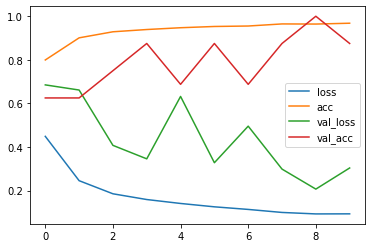

In [17]:
# ploting to check various factors

import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(model.history.history).plot()
plt.show()

In [44]:
loss,acc=model.evaluate(x_test,y_test)
print(loss,acc)

624/624 [==============================] - 3s 4ms/sample - loss: 0.4785 - acc: 0.7997
0.47854673723952895 0.79967946


In [ ]:
# To load the model again

model=tf.keras.models.load_model("CHEST_XRAY.model")

In [ ]:
# to load and test with images

In [20]:
import os # To create paths and itreate through directories
import cv2 #image operations

Categories=["NORMAL","PNEUMONIA"]
# Preprocessing function

def preprocess(filepath):
    IMG_SIZE=80 # same as before
    image_array=cv2.imread(filepath, cv2.IMREAD_GRAYSCALE) 
    new_array=cv2.resize(image_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)
    

In [40]:
prediction=model.predict([preprocess("NORMAL.jpeg")])
pred=prediction.astype('int').tolist()[0][0]

# Creating the prediction

In [41]:
Categories[pred]

# Printing actual prediction

'NORMAL'

In [42]:
prediction2=model.predict([preprocess("PNEUMONIA.jpeg")])
pred2=prediction2.astype('int').tolist()[0][0]


In [43]:
Categories[int(pred2)]

'NORMAL'

In [ ]:
# Please note that prediction2.astype('int').tolist()[0][1] will always have a value of 1 since it indicates that image is greyscale